In [2]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
    
def func_lin(x, a, b):
    return b * x + a

In [3]:
save_path = '../../data/coherences/' 

info = np.load(save_path + "info.npy", allow_pickle=True)
on_coh_beta = np.load(save_path + "on_coh_beta.npy", allow_pickle=True)
on_imcohy_beta = np.load(save_path + "on_imcohy_beta.npy", allow_pickle=True)
off_coh_beta = np.load(save_path + "off_coh_beta.npy", allow_pickle=True)
off_imcohy_beta = np.load(save_path + "off_imcohy_beta.npy", allow_pickle=True)

In [4]:
info

array({'labels': ['SMA', 'leftM1', 'rightM1', 'STN_R01', 'STN_R12', 'STN_R23', 'STN_L01', 'STN_L12', 'STN_L23'], 'subjects': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), 'csd_average': 'mean'},
      dtype=object)

In [5]:
on_exponent = np.load(save_path + "on_exponents.npy", allow_pickle=True)
off_exponent = np.load(save_path + "off_exponents.npy", allow_pickle=True)

# fooof with "knee" has much worse correlations!
# on_exponent_knee = np.load(save_path + "on_exponent_knee.npy", allow_pickle=True) 
# off_exponent_knee = np.load(save_path + "off_exponent_knee.npy", allow_pickle=True)
#on_exponent_fixed = np.load(save_path + "on_exponent_fixed.npy", allow_pickle=True)
#off_exponent_fixed = np.load(save_path + "off_exponent_fixed.npy", allow_pickle=True)
#on_exponent_ctx = np.load(save_path + "on_exponent_ctx.npy", allow_pickle=True)
#off_exponent_ctx = np.load(save_path + "off_exponent_ctx.npy", allow_pickle=True)

# CTX-STN

In [6]:
ctx = range(3)
stn = range(3, 9)
combs = [(x,y) for x in ctx for y in stn]

In [7]:
n_sub = on_exponent.shape[0]
n_elec = on_exponent.shape[1]

on_slopes = np.zeros([n_sub, len(combs)])
off_slopes = np.zeros([n_sub, len(combs)])

on_imcohys = np.zeros([n_sub, len(combs)])
off_imcohys = np.zeros([n_sub, len(combs)])

for subj in range(14):
    for i, tup in enumerate(combs):

        slope_ij = on_exponent[subj, tup[0]] * on_exponent[subj, tup[1]]
        on_slopes[subj, i] = slope_ij
        
        slope_ij = off_exponent[subj, tup[0]] * off_exponent[subj, tup[1]]
        off_slopes[subj, i] = slope_ij
        
        coh_ij = on_imcohy_beta[subj, tup[0], tup[1]]
        on_imcohys[subj, i] = coh_ij
        
        coh_ij = off_imcohy_beta[subj, tup[0], tup[1]]
        off_imcohys[subj, i] = coh_ij

## new method: multiple regression

In [11]:
on_slopes_both = np.zeros([n_sub, len(combs), 2])
off_slopes_both = np.zeros([n_sub, len(combs), 2])

for subj in range(14):
    for i, tup in enumerate(combs):

        slope_i = on_exponent[subj, tup[0]]
        slope_j = on_exponent[subj, tup[1]]
        on_slopes_both[subj, i, 0] = slope_i
        on_slopes_both[subj, i, 1] = slope_j
        
        slope_i = off_exponent[subj, tup[0]]
        slope_j = off_exponent[subj, tup[1]]
        off_slopes_both[subj, i, 0] = slope_i
        off_slopes_both[subj, i, 1] = slope_j

In [12]:
print(on_slopes_both.shape, on_imcohys.shape)

(14, 18, 2) (14, 18)


In [7]:
print("On Correlations slopes fixed and imcohy")
pearsons_on = []
for subj in range(14):
    if subj == 6:
        continue
    pearson_corr = pearsonr(on_slopes[subj, :], on_imcohys[subj, :])
    pearsons_on.append(pearson_corr[0])
    print(f"Pearson's r={pearson_corr[0]:.2f}")
    
pearson_corr = pearsonr(on_slopes[np.isfinite(on_slopes)].flatten(), on_imcohys[np.isfinite(on_slopes)].flatten())
print(f"Average Pearson's r={pearson_corr[0]:.2f}")
print(f"Individual Average Pearson's r={np.mean(pearsons_on):.2f}")

print("Off Correlations slopes fixed and imcohy")
pearsons_off = []
for subj in range(14):
    if subj == 6:
        continue
    pearson_corr = pearsonr(off_slopes[subj, :], off_imcohys[subj, :])
    pearsons_off.append(pearson_corr[0])
    print(f"Pearson's r={pearson_corr[0]:.2f}")
    
pearson_corr = pearsonr(off_slopes[np.isfinite(off_slopes)].flatten(), off_imcohys[np.isfinite(off_slopes)].flatten())
print(f"Average Pearson's r={pearson_corr[0]:.2f}")
print(f"Individual Average Pearson's r={np.mean(pearsons_off):.2f}")

On Correlations slopes fixed and imcohy
Pearson's r=-0.27
Pearson's r=0.44
Pearson's r=0.26
Pearson's r=0.19
Pearson's r=0.38
Pearson's r=0.53
Pearson's r=0.04
Pearson's r=0.44
Pearson's r=0.09
Pearson's r=0.25
Pearson's r=0.44
Pearson's r=-0.36
Pearson's r=0.38
Average Pearson's r=0.49
Individual Average Pearson's r=0.22
Off Correlations slopes fixed and imcohy
Pearson's r=0.46
Pearson's r=0.01
Pearson's r=-0.67
Pearson's r=0.04
Pearson's r=-0.22
Pearson's r=0.56
Pearson's r=-0.02
Pearson's r=0.73
Pearson's r=0.09
Pearson's r=-0.23
Pearson's r=-0.06
Pearson's r=-0.24
Pearson's r=0.44
Average Pearson's r=0.51
Individual Average Pearson's r=0.07


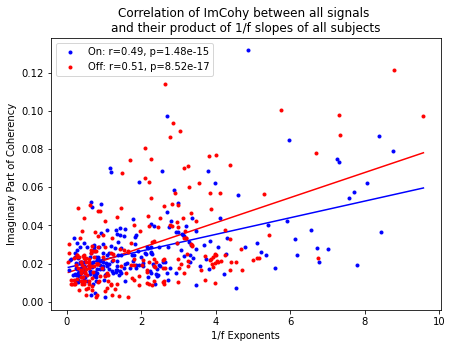

In [33]:
on_slopes_fl = on_slopes.flatten()
on_imcohys_fl = on_imcohys.flatten()
on_slopes_all = on_slopes_fl[np.isfinite(on_slopes_fl)]
on_imcohys_all = on_imcohys_fl[np.isfinite(on_slopes_fl)]

off_slopes_fl = off_slopes.flatten()
off_imcohys_fl = off_imcohys.flatten()
off_slopes_all = off_slopes_fl[np.isfinite(off_slopes_fl)]
off_imcohys_all = off_imcohys_fl[np.isfinite(off_slopes_fl)]

on_pearson = pearsonr(on_imcohys_all, on_slopes_all)
off_pearson = pearsonr(off_imcohys_all, off_slopes_all)

mini = np.min([np.min(on_slopes_all), np.min(off_slopes_all)])
maxi = np.max([np.max(on_slopes_all), np.max(off_slopes_all)])

x = np.linspace(mini, maxi, on_slopes_all.shape[0])

on_popt, on_pcov = curve_fit(func_lin,  on_slopes_all, on_imcohys_all, p0=(1, 1),maxfev=5000)
off_popt, off_pcov = curve_fit(func_lin,  off_slopes_all, off_imcohys_all, p0=(1, 1),maxfev=5000)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(x, func_lin(x, *on_popt), 'r-', c="b")
ax.plot(x, func_lin(x, *off_popt), 'r-', c="r")
ax.plot(on_slopes_all, on_imcohys_all, ".", label=f"On: r={on_pearson[0]:.2f}, p={on_pearson[1]:.2e}", c="b")
ax.plot(off_slopes_all, off_imcohys_all, ".", label=f"Off: r={off_pearson[0]:.2f}, p={off_pearson[1]:.2e}", c="r")
ax.set_xlabel("1/f Exponents")
ax.set_ylabel("Imaginary Part of Coherency")
ax.set_title("Correlation of ImCohy between all signals \nand their product of 1/f slopes of all subjects")

ax.legend()
#plt.savefig("../../plots/1-f_exponent_corr_all_Sub_ctx-stn.pdf")
plt.savefig("/Users/moritzgerster/Documents/Promotion/Research_Updates/slope_coh_corr_group_all-all.pdf")
plt.show()

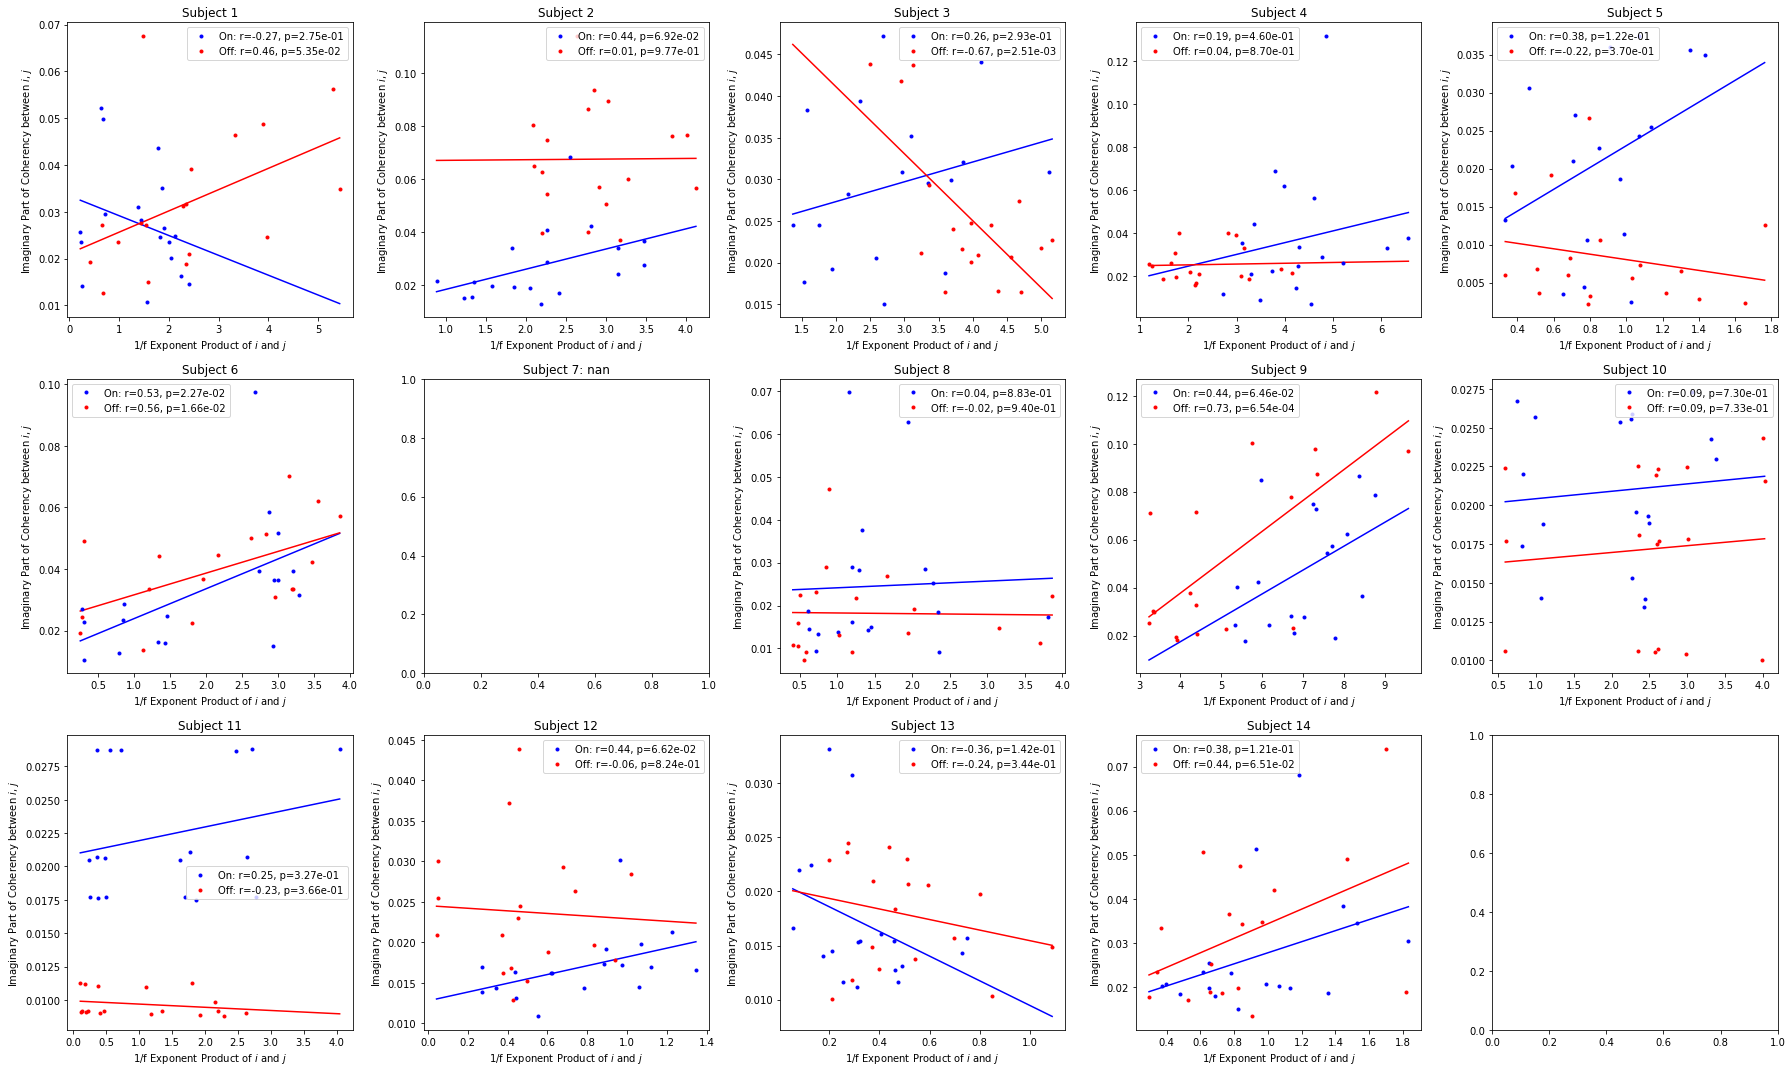

In [34]:
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
ax = ax.flatten()
for subj in range(14):
    if subj == 6: 
        ax[subj].set_title(f"Subject {subj+1}: nan")
        continue

    on_pearson = pearsonr(on_imcohys[subj, :], on_slopes[subj, :])
    off_pearson = pearsonr(off_imcohys[subj, :], off_slopes[subj, :])

    mini = np.min([np.min(on_slopes[subj, :]), np.min(off_slopes[subj, :])])
    maxi = np.max([np.max(on_slopes[subj, :]), np.max(off_slopes[subj, :])])

    x = np.linspace(mini, maxi, on_slopes[subj, :].shape[0])

    on_popt, on_pcov = curve_fit(func_lin,  on_slopes[subj, :], on_imcohys[subj, :], p0=(1, 1),maxfev=5000)
    off_popt, off_pcov = curve_fit(func_lin,  off_slopes[subj, :], off_imcohys[subj, :], p0=(1, 1),maxfev=5000)


    ax[subj].plot(x, func_lin(x, *on_popt), 'r-', c="b")
    ax[subj].plot(x, func_lin(x, *off_popt), 'r-', c="r")
    ax[subj].plot(on_slopes[subj, :], on_imcohys[subj, :], ".", label=f"On: r={on_pearson[0]:.2f}, p={on_pearson[1]:.2e}", c="b")
    ax[subj].plot(off_slopes[subj, :], off_imcohys[subj, :], ".", label=f"Off: r={off_pearson[0]:.2f}, p={off_pearson[1]:.2e}", c="r")
    ax[subj].set_xlabel("1/f Exponent Product of $i$ and $j$")
    ax[subj].set_ylabel("Imaginary Part of Coherency between $i$, $j$")
    ax[subj].set_title(f"Subject {subj+1}")
    ax[subj].legend()

plt.tight_layout()
#plt.savefig("../../plots/1-f_exponent_corr_ind_Sub_ctx-stn.pdf")
plt.savefig("/Users/moritzgerster/Documents/Promotion/Research_Updates/slope_coh_corr_single_all-all.pdf")
plt.show()

# Within Cortex:

In [10]:
on_slopes_ctx = np.zeros([14, len(list(combinations(range(3), 2)))])
off_slopes_ctx = np.zeros([14, len(list(combinations(range(3), 2)))])

on_imcohys_ctx = np.zeros([14, len(list(combinations(range(3), 2)))])
off_imcohys_ctx = np.zeros([14, len(list(combinations(range(3), 2)))])
# on_coh = np.zeros([14, len(list(itertools.combinations(range(6), 2)))])
# off_coh = np.zeros([14, len(list(itertools.combinations(range(6), 2)))])

for subj in range(14):
    for i, tup in enumerate(combinations(range(3), 2)):

        slope_ij = on_exponent[subj, tup[0]] * on_exponent[subj, tup[1]]
        on_slopes_ctx[subj, i] = slope_ij
        
        slope_ij = off_exponent[subj, tup[0]] * off_exponent[subj, tup[1]]
        off_slopes_ctx[subj, i] = slope_ij
        
        coh_ij = on_imcohy_beta[subj, tup[0], tup[1]]
        on_imcohys_ctx[subj, i] = coh_ij
        
        coh_ij = off_imcohy_beta[subj, tup[0], tup[1]]
        off_imcohys_ctx[subj, i] = coh_ij

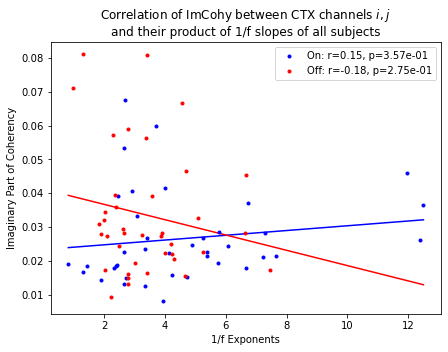

In [30]:
on_slopes_fl = on_slopes_ctx.flatten()
on_imcohys_fl = on_imcohys_ctx.flatten()
on_slopes_all = on_slopes_fl[np.isfinite(on_slopes_fl)]
on_imcohys_all = on_imcohys_fl[np.isfinite(on_slopes_fl)]

off_slopes_fl = off_slopes_ctx.flatten()
off_imcohys_fl = off_imcohys_ctx.flatten()
off_slopes_all = off_slopes_fl[np.isfinite(off_slopes_fl)]
off_imcohys_all = off_imcohys_fl[np.isfinite(off_slopes_fl)]

on_pearson = pearsonr(on_imcohys_all, on_slopes_all)
off_pearson = pearsonr(off_imcohys_all, off_slopes_all)

mini = np.min([np.min(on_slopes_all), np.min(off_slopes_all)])
maxi = np.max([np.max(on_slopes_all), np.max(off_slopes_all)])

x = np.linspace(mini, maxi, on_slopes_all.shape[0])

on_popt, on_pcov = curve_fit(func_lin,  on_slopes_all, on_imcohys_all, p0=(1, 1),maxfev=5000)
off_popt, off_pcov = curve_fit(func_lin,  off_slopes_all, off_imcohys_all, p0=(1, 1),maxfev=5000)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(x, func_lin(x, *on_popt), 'r-', c="b")
ax.plot(x, func_lin(x, *off_popt), 'r-', c="r")
ax.plot(on_slopes_all, on_imcohys_all, ".", label=f"On: r={on_pearson[0]:.2f}, p={on_pearson[1]:.2e}", c="b")
ax.plot(off_slopes_all, off_imcohys_all, ".", label=f"Off: r={off_pearson[0]:.2f}, p={off_pearson[1]:.2e}", c="r")
ax.set_xlabel("1/f Exponents")
ax.set_ylabel("Imaginary Part of Coherency")
ax.set_title("Correlation of ImCohy between CTX channels $i, j$\nand their product of 1/f slopes of all subjects")

ax.legend()
#plt.savefig("../../plots/1-f_exponent_corr_all_Sub_ctx.pdf")
plt.savefig("/Users/moritzgerster/Documents/Promotion/Research_Updates/slope_coh_corr_group_ctx.pdf")
plt.show()

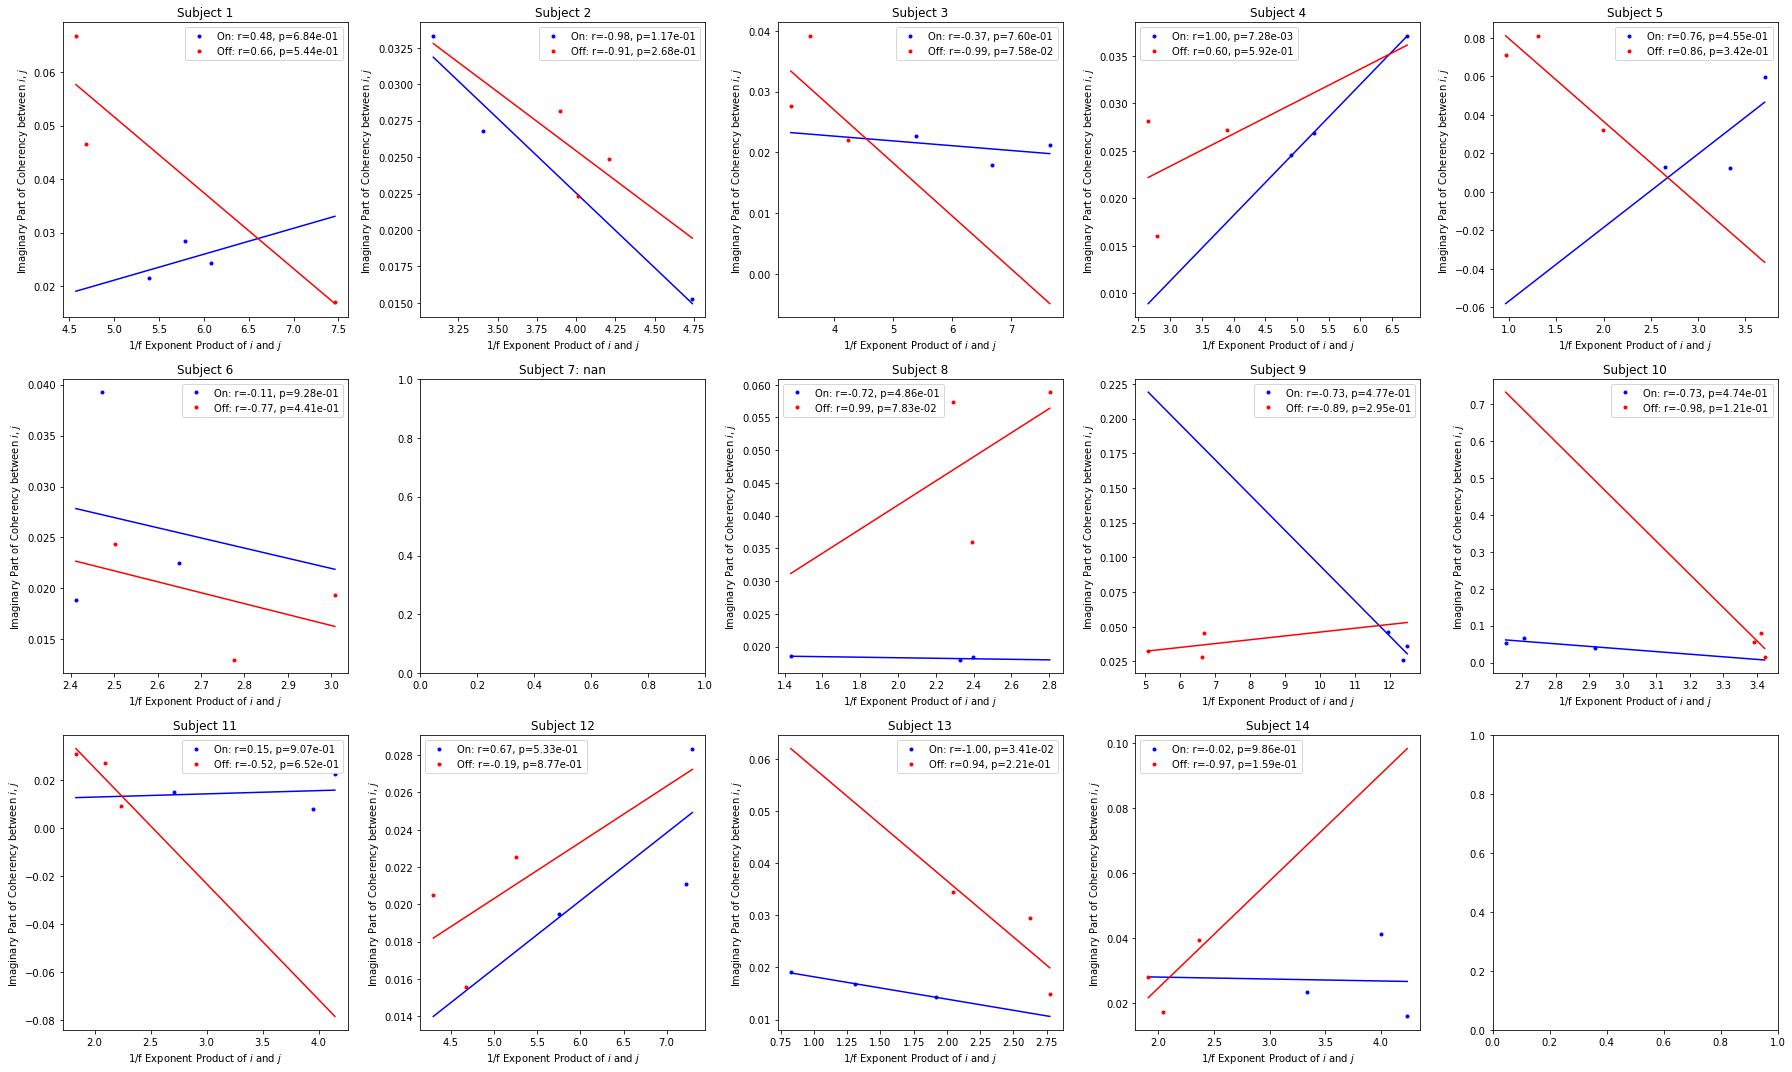

In [35]:
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
ax = ax.flatten()
for subj in range(14):
    if subj == 6: 
        ax[subj].set_title(f"Subject {subj+1}: nan")
        continue

    on_pearson = pearsonr(on_imcohys_ctx[subj, :], on_slopes_ctx[subj, :])
    off_pearson = pearsonr(off_imcohys_ctx[subj, :], on_slopes_ctx[subj, :])

    mini = np.min([np.min(on_slopes_ctx[subj, :]), np.min(off_slopes_ctx[subj, :])])
    maxi = np.max([np.max(on_slopes_ctx[subj, :]), np.max(off_slopes_ctx[subj, :])])

    x = np.linspace(mini, maxi, on_slopes_ctx[subj, :].shape[0])

    on_popt, on_pcov = curve_fit(func_lin,  on_slopes_ctx[subj, :], on_imcohys_ctx[subj, :], p0=(1, 1),maxfev=5000)
    off_popt, off_pcov = curve_fit(func_lin,  off_slopes_ctx[subj, :], off_imcohys_ctx[subj, :], p0=(1, 1),maxfev=5000)


    ax[subj].plot(x, func_lin(x, *on_popt), 'r-', c="b")
    ax[subj].plot(x, func_lin(x, *off_popt), 'r-', c="r")
    ax[subj].plot(on_slopes_ctx[subj, :], on_imcohys_ctx[subj, :], ".", label=f"On: r={on_pearson[0]:.2f}, p={on_pearson[1]:.2e}", c="b")
    ax[subj].plot(off_slopes_ctx[subj, :], off_imcohys_ctx[subj, :], ".", label=f"Off: r={off_pearson[0]:.2f}, p={off_pearson[1]:.2e}", c="r")
    ax[subj].set_xlabel("1/f Exponent Product of $i$ and $j$")
    ax[subj].set_ylabel("Imaginary Part of Coherency between $i$, $j$")
    ax[subj].set_title(f"Subject {subj+1}")
    ax[subj].legend()

plt.tight_layout()
#plt.savefig("../../plots/1-f_exponent_corr_ind_Sub_ctx.pdf")
plt.savefig("/Users/moritzgerster/Documents/Promotion/Research_Updates/slope_coh_corr_single_ctx.pdf")

plt.show()

# within STN

In [13]:
on_slopes_stn = np.zeros([14, len(list(combinations(range(6), 2)))])
off_slopes_stn = np.zeros([14, len(list(combinations(range(6), 2)))])

on_imcohys_stn = np.zeros([14, len(list(combinations(range(6), 2)))])
off_imcohys_stn = np.zeros([14, len(list(combinations(range(6), 2)))])

for subj in range(14):
    for i, tup in enumerate(combinations(range(3, 9), 2)):

        slope_ij = on_exponent[subj, tup[0]] * on_exponent[subj, tup[1]]
        on_slopes_stn[subj, i] = slope_ij
        
        slope_ij = off_exponent[subj, tup[0]] * off_exponent[subj, tup[1]]
        off_slopes_stn[subj, i] = slope_ij
        
        coh_ij = on_imcohy_beta[subj, tup[0], tup[1]]
        on_imcohys_stn[subj, i] = coh_ij
        
        coh_ij = off_imcohy_beta[subj, tup[0], tup[1]]
        off_imcohys_stn[subj, i] = coh_ij

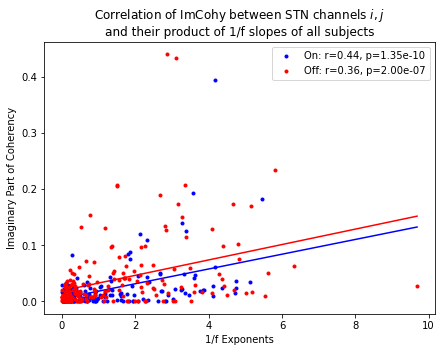

In [32]:
on_slopes_fl = on_slopes_stn.flatten()
on_imcohys_fl = on_imcohys_stn.flatten()
on_slopes_all = on_slopes_fl[np.isfinite(on_slopes_fl)]
on_imcohys_all = on_imcohys_fl[np.isfinite(on_slopes_fl)]

off_slopes_fl = off_slopes_stn.flatten()
off_imcohys_fl = off_imcohys_stn.flatten()
off_slopes_all = off_slopes_fl[np.isfinite(off_slopes_fl)]
off_imcohys_all = off_imcohys_fl[np.isfinite(off_slopes_fl)]

on_pearson = pearsonr(on_imcohys_all, on_slopes_all)
off_pearson = pearsonr(off_imcohys_all, off_slopes_all)

mini = np.min([np.min(on_slopes_all), np.min(off_slopes_all)])
maxi = np.max([np.max(on_slopes_all), np.max(off_slopes_all)])

x = np.linspace(mini, maxi, on_slopes_all.shape[0])

on_popt, on_pcov = curve_fit(func_lin,  on_slopes_all, on_imcohys_all, p0=(1, 1),maxfev=5000)
off_popt, off_pcov = curve_fit(func_lin,  off_slopes_all, off_imcohys_all, p0=(1, 1),maxfev=5000)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(x, func_lin(x, *on_popt), 'r-', c="b")
ax.plot(x, func_lin(x, *off_popt), 'r-', c="r")
ax.plot(on_slopes_all, on_imcohys_all, ".", label=f"On: r={on_pearson[0]:.2f}, p={on_pearson[1]:.2e}", c="b")
ax.plot(off_slopes_all, off_imcohys_all, ".", label=f"Off: r={off_pearson[0]:.2f}, p={off_pearson[1]:.2e}", c="r")
ax.set_xlabel("1/f Exponents")
ax.set_ylabel("Imaginary Part of Coherency")
ax.set_title("Correlation of ImCohy between STN channels $i, j$\nand their product of 1/f slopes of all subjects")

ax.legend()
#plt.savefig("../../plots/1-f_exponent_corr_all_Sub_stn.pdf")
plt.savefig("/Users/moritzgerster/Documents/Promotion/Research_Updates/slope_coh_corr_group_stn.pdf")

plt.show()

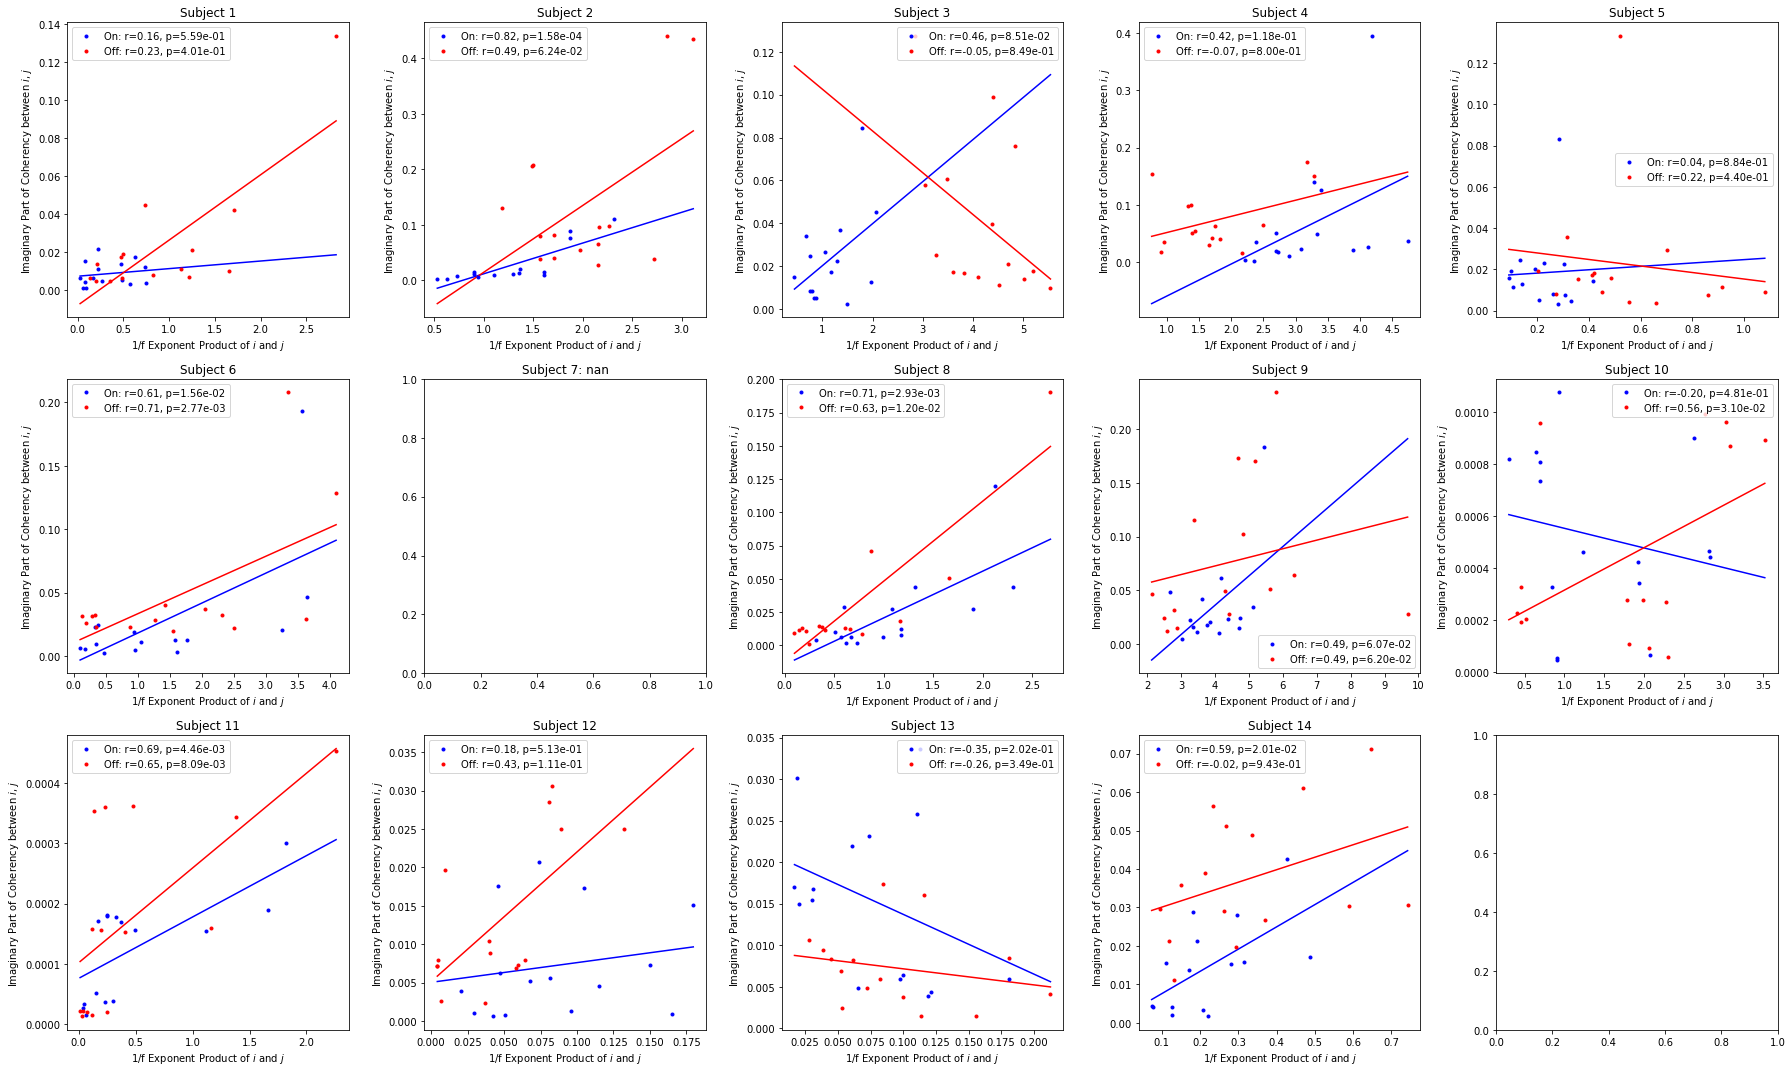

In [36]:
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
ax = ax.flatten()
for subj in range(14):
    if subj == 6: 
        ax[subj].set_title(f"Subject {subj+1}: nan")
        continue

    on_pearson = pearsonr(on_imcohys_stn[subj, :], on_slopes_stn[subj, :])
    off_pearson = pearsonr(off_imcohys_stn[subj, :], on_slopes_stn[subj, :])

    mini = np.min([np.min(on_slopes_stn[subj, :]), np.min(off_slopes_stn[subj, :])])
    maxi = np.max([np.max(on_slopes_stn[subj, :]), np.max(off_slopes_stn[subj, :])])

    x = np.linspace(mini, maxi, on_slopes_stn[subj, :].shape[0])

    on_popt, on_pcov = curve_fit(func_lin,  on_slopes_stn[subj, :], on_imcohys_stn[subj, :], p0=(1, 1),maxfev=5000)
    off_popt, off_pcov = curve_fit(func_lin,  off_slopes_stn[subj, :], off_imcohys_stn[subj, :], p0=(1, 1),maxfev=5000)


    ax[subj].plot(x, func_lin(x, *on_popt), 'r-', c="b")
    ax[subj].plot(x, func_lin(x, *off_popt), 'r-', c="r")
    ax[subj].plot(on_slopes_stn[subj, :], on_imcohys_stn[subj, :], ".", label=f"On: r={on_pearson[0]:.2f}, p={on_pearson[1]:.2e}", c="b")
    ax[subj].plot(off_slopes_stn[subj, :], off_imcohys_stn[subj, :], ".", label=f"Off: r={off_pearson[0]:.2f}, p={off_pearson[1]:.2e}", c="r")
    ax[subj].set_xlabel("1/f Exponent Product of $i$ and $j$")
    ax[subj].set_ylabel("Imaginary Part of Coherency between $i$, $j$")
    ax[subj].set_title(f"Subject {subj+1}")
    ax[subj].legend()

plt.tight_layout()
#plt.savefig("../../plots/1-f_exponent_corr_ind_Sub_stn.pdf")
plt.savefig("/Users/moritzgerster/Documents/Promotion/Research_Updates/slope_coh_corr_single_stn.pdf")
plt.show()

# STN Slope, STN-CTX Connectivity: